In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import plotly.express as px

In [2]:
# Set the desired directory path
new_directory = '/Users/ariel/Desktop/Data Science/ITC/Finalproject'
# Change the current directory
os.chdir(new_directory)

In [3]:
# Set the parent directory path where the folders with CSV files are located
parent_directory = 'Finished_Dataframes/'

# Initialize an empty DataFrame to store the combined data
combined_data = pd.DataFrame()

# Iterate through all the folders in the parent directory
for foldername in os.listdir(parent_directory):
    folder_path = os.path.join(parent_directory, foldername)

    # Check if the item is a directory
    if os.path.isdir(folder_path):
        # Iterate through all the files in the folder
        for filename in os.listdir(folder_path):
            if filename.endswith('.csv'):
                # Extract the letters before ".csv" as the value for the "letter" column
                letter = filename[:-4]  # Remove the ".csv" extension
                letter = letter.split('_')[-1]  # Extract the last part of the file name

                # Read each CSV file into a DataFrame
                file_path = os.path.join(folder_path, filename)

                try:
                    data = pd.read_csv(file_path)
                except pd.errors.EmptyDataError:
                    print(f"Skipping empty file: {filename}")
                    continue

                # Check if the DataFrame has any rows
                if data.empty:
                    print(f"Skipping file with no data: {filename}")
                    continue

                # Add the "letter" column to the DataFrame
                data['letter'] = letter.lower()

                # Append the data to the combined DataFrame
                combined_data = pd.concat([combined_data, data], ignore_index=True)

Skipping empty file: nothing.csv
Skipping empty file: nothing.csv


In [4]:
display(combined_data.head())
display(combined_data.tail())
combined_data.shape

image_name  x_left_0  x_left_1  x_left_2  x_left_3  x_left_4  x_left_5   
0  A1821.jpg  0.481023  0.572303  0.608389  0.573495  0.525112  0.456642  \
1  A2241.jpg  0.479932  0.563749  0.635474  0.655600  0.656166  0.597159   
2   A610.jpg  0.639837  0.710490  0.755953  0.768045  0.765065  0.711817   
3   A580.jpg  0.530418  0.608258  0.665477  0.673080  0.666699  0.603801   
4   A535.jpg  0.534936  0.604139  0.644492  0.647617  0.644056  0.594464   

   x_left_6  x_left_7  x_left_8  ...  z_left_12  z_left_13  z_left_14   
0  0.470151  0.520419  0.551390  ...  -0.107990  -0.032637  -0.116295  \
1  0.599897  0.579094  0.567782  ...  -0.057201  -0.005320  -0.046333   
2  0.712188  0.712681  0.715670  ...  -0.057976  -0.012310  -0.056183   
3  0.608733  0.604089  0.601914  ...  -0.059940  -0.009364  -0.056944   
4  0.592797  0.590428  0.591608  ...  -0.061229  -0.010663  -0.057804   

   z_left_15  z_left_16  z_left_17  z_left_18  z_left_19  z_left_20  letter  
0  -0.106064  -0.073684  -0.052842  -0.113786  -0.101525  -0.074087       a  
1  -0.043234  -0.028673  -0.012114  -0.040354  -0.031319  -0.015152       a  
2  -0.051064  -0.032643  -0.022034  -0.052286  -0.042106  -0.023853       a  
3  -0.054098  -0.034128  -0.020033  -0.044233  -0.032614  -0.013001       a  
4  -0.053430  -0.033607  -0.020277  -0.048685  -0.038495  -0.019765       a  

[5 rows x 65 columns]

image_name  x_left_0  x_left_1  x_left_2  x_left_3  x_left_4  x_left_5   
428639   Z995.jpg  0.473292  0.591244  0.679987  0.622671  0.542987  0.767049  \
428640   Z996.jpg  0.480326  0.586755  0.678375  0.629165  0.546433  0.771774   
428641   Z997.jpg  0.480874  0.591377  0.684673  0.627318  0.540687  0.769288   
428642   Z998.jpg  0.472444  0.585505  0.681033  0.621730  0.536919  0.765524   
428643   Z999.jpg  0.468378  0.579291  0.674707  0.620677  0.532285  0.766006   

        x_left_6  x_left_7  x_left_8  ...  z_left_12  z_left_13  z_left_14   
428639  0.827840  0.854735  0.882476  ...   0.604953   0.572249   0.550122  \
428640  0.831435  0.858110  0.885910  ...   0.604577   0.578914   0.555008   
428641  0.830815  0.859618  0.886764  ...   0.607889   0.576650   0.556422   
428642  0.827947  0.855269  0.884255  ...   0.602701   0.572945   0.552560   
428643  0.827668  0.856249  0.883538  ...   0.602180   0.573045   0.548508   

        z_left_15  z_left_16  z_left_17  z_left_18  z_left_19  z_left_20   
428639   0.529531   0.534666   0.487073   0.465858   0.460620   0.460334  \
428640   0.531186   0.533196   0.491942   0.468557   0.459911   0.458331   
428641   0.538899   0.540029   0.489161   0.470687   0.464621   0.461932   
428642   0.529055   0.532640   0.483666   0.463885   0.457435   0.456120   
428643   0.527653   0.531176   0.485296   0.463143   0.454887   0.453636   

        letter  
428639       z  
428640       z  
428641       z  
428642       z  
428643       z  

[5 rows x 65 columns]

(428644, 65)

In [5]:
# group the data by letter and add summaries for each column
data_summary = combined_data.drop('image_name', axis=1)
data_summary = data_summary.groupby('letter').agg(['min', 'max', 'mean', 'median', 'std','count']).T
display(data_summary)

letter                       a             b             c             d   
x_left_0  min         0.104815      0.070849     -0.048919      0.047277  \
          max         0.929923      0.872532      0.949206      0.895731   
          mean        0.500930      0.495727      0.403852      0.479766   
          median      0.498846      0.488101      0.405808      0.492462   
          std         0.138453      0.135305      0.142688      0.127389   
...                        ...           ...           ...           ...   
z_left_20 max         0.258890      0.396462      0.453872      0.250402   
          mean       -0.041473     -0.091535     -0.094289     -0.097559   
          median     -0.032217     -0.081803     -0.078314     -0.083253   
          std         0.051105      0.074844      0.080944      0.074015   
          count   13233.000000  15385.000000  14557.000000  17215.000000   

letter                    del             e             f             g   
x_left_0  min        0.071255      0.087559      0.082420     -0.050666  \
          max        0.925149      0.874215      0.894926      1.139004   
          mean       0.624144      0.498235      0.559427      0.668073   
          median     0.646587      0.504541      0.556749      0.686609   
          std        0.156161      0.142598      0.112684      0.151746   
...                       ...           ...           ...           ...   
z_left_20 max        0.192570      0.987485      0.885629      0.911441   
          mean      -0.066867      0.041485     -0.041106      0.003630   
          median    -0.055256     -0.022064     -0.083882     -0.061949   
          std        0.060839      0.210049      0.169837      0.229339   
          count   5308.000000  15222.000000  21292.000000  19744.000000   

letter                       h             i  ...             s        space   
x_left_0  min         0.025949      0.106559  ...      0.093170    -0.056390  \
          max         1.136192      0.923158  ...      0.946137     1.041266   
          mean        0.749848      0.552883  ...      0.508889     0.586975   
          median      0.758664      0.542794  ...      0.507431     0.580725   
          std         0.129922      0.130438  ...      0.152129     0.155995   
...                        ...           ...  ...           ...          ...   
z_left_20 max         0.985370      0.904629  ...      0.829065     0.698080   
          mean       -0.009081      0.006170  ...      0.051669     0.057472   
          median     -0.098501     -0.037235  ...     -0.022762    -0.018016   
          std         0.275793      0.194869  ...      0.205782     0.175970   
          count   19669.000000  19716.000000  ...  14746.000000  7568.000000   

letter                       t       test             u             v   
x_left_0  min         0.075037   0.145812      0.074272      0.090126  \
          max         0.916947   0.800812      0.892948      0.928478   
          mean        0.461248   0.477573      0.523939      0.511130   
          median      0.473146   0.445499      0.531811      0.496840   
          std         0.135004   0.197424      0.166489      0.164859   
...                        ...        ...           ...           ...   
z_left_20 max         0.896390   0.021303      0.843925      0.887218   
          mean        0.037764  -0.094072      0.000172     -0.028361   
          median     -0.005738  -0.080930     -0.058591     -0.066804   
          std         0.180606   0.086406      0.247548      0.223264   
          count   15764.000000  18.000000  15860.000000  17648.000000   

letter                       w             x             y             z  
x_left_0  min         0.066900      0.104701      0.029245      0.052116  
          max         0.927565      0.890143      0.958062      0.931317  
          mean        0.534710      0.507267      0.527896      0.400689  
          median      0.537868      0.493633    

In [6]:
display(combined_data['letter'].value_counts())

letter
f          21292
l          21019
k          20111
g          19744
i          19716
h          19669
v          17648
d          17215
r          17177
j          16324
u          15860
t          15764
y          15566
b          15385
o          15346
e          15222
w          15054
x          14933
s          14746
c          14557
z          13461
a          13233
p          12529
q          11886
m          11585
n          10700
space       7568
del         5308
test          18
nothing        8
Name: count, dtype: int64

In [7]:
# drop the "letters" nothing and test
combined_data = combined_data[~combined_data['letter'].isin(['nothing', 'test'])]

In [8]:
# Remove duplicates in the "image_name" column
combined_data = combined_data.drop_duplicates(subset=['image_name'])

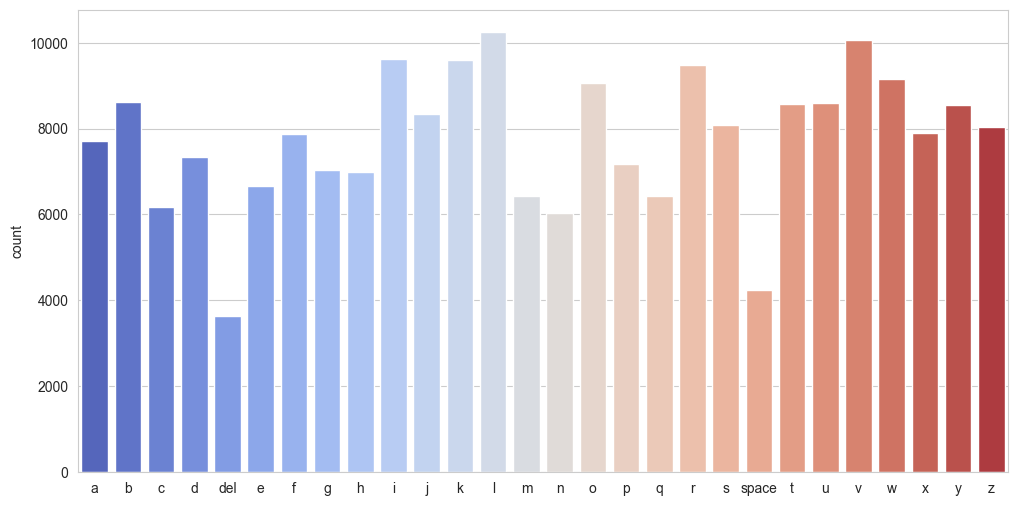

In [9]:
# plot the data counts for each letter
sns.set_style('whitegrid')
plt.figure(figsize=(12, 6))
sns.countplot(x='letter', data=combined_data, palette='coolwarm')
plt.xlabel(" ")
plt.show()

# What Signs are we trying to predict?
<img src="https://mediapipe.dev/images/mobile/hand_landmarks.png" width="750">


In [10]:
# example of an image with landmarks
# take a one image data
example_a = combined_data.loc[combined_data['image_name'] == 'A0001_test.jpg'][:1]

# coordinates of landmarks
df = pd.DataFrame({
    'x': example_a.iloc[:,1:22].values.flatten(),
    'y': example_a.iloc[:,22:43].values.flatten(),
    'z': example_a.iloc[:,43:64].values.flatten()
})

In [11]:
# interactive 3d plot of the landmarks
fig = px.scatter_3d(df, x="x", y="y", z="z", title='A', color_discrete_sequence=["red"])
fig.show()

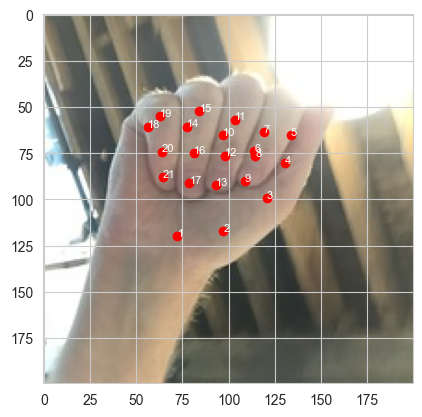

In [12]:
image_name = example_a.iloc[0]['image_name']
# Load the image
image_path = image_name
image = plt.imread(image_path)

# Get image dimensions
image_height, image_width, _ = image.shape

# Create a figure and axis
fig, ax = plt.subplots()
ax.imshow(image)

# Plot the landmarks
ax.scatter(df['x'] * image_width, df['y'] * image_height, color='red', marker='o')

# Add labels to the landmarks if desired
for i, landmark in df.iterrows():
    ax.text(landmark['x'] * image_width, landmark['y'] * image_height, str(i+1), color='white', fontsize=8)

# Show the image with landmarks
plt.show()


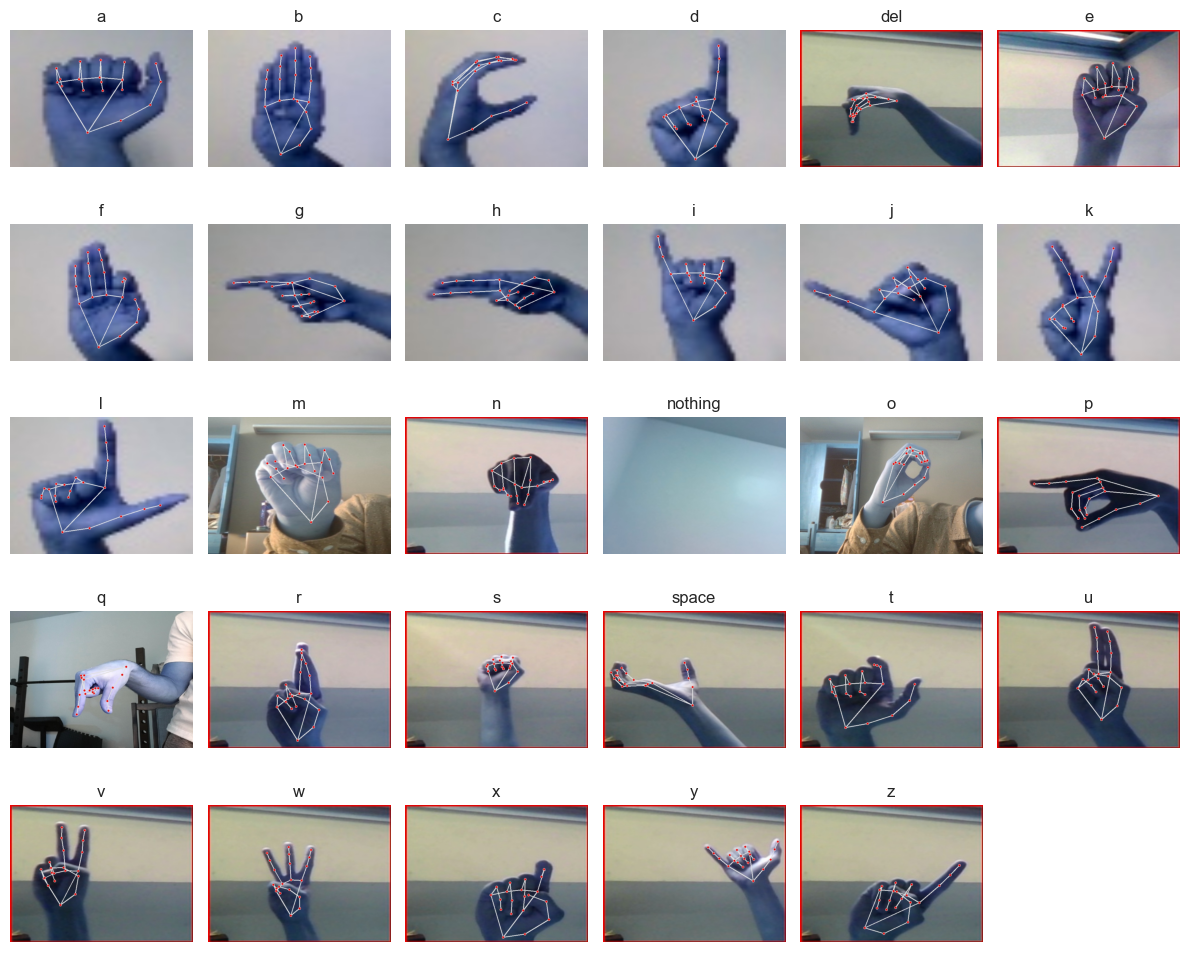

In [13]:
# random images of all of the letters we have
# Path to the folder containing the images
folder_path = 'images with landmarks'

# Create a subplot grid for displaying multiple images
num_images = 29
num_rows = 5
num_cols = 6
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 10))

# Iterate over all files in the folder
for i, filename in enumerate(sorted(os.listdir(folder_path))):
    if i >= num_images or not (filename.endswith('.jpg') or filename.endswith('.png')):
        continue

    # Read the image
    image_path = os.path.join(folder_path, filename)
    image = mpimg.imread(image_path)

    # Calculate the subplot index
    row_idx = i // num_cols
    col_idx = i % num_cols

    # Extract the title from the filename
    title = filename.split('.')[0]  # Remove the extension
    title = title.split('_')[-1]  # Extract the last part of the file name

    # Display the image in the subplot
    axs[row_idx, col_idx].imshow(image)
    axs[row_idx, col_idx].axis('off')
    axs[row_idx, col_idx].set_title(title)

# Remove any empty subplots
if i < (num_rows * num_cols - 1):
    for j in range(i + 1, num_rows * num_cols):
        axs[j // num_cols, j % num_cols].axis('off')

# Adjust the layout of the subplots
plt.tight_layout()

# Show the plot
plt.show()

In [14]:
# Distributions for images per letter

In [15]:
# splitting the data

In [16]:
# observing after the split

In [17]:
# random forest